In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
from collections import defaultdict
from collections import Counter
from collections import OrderedDict
import numpy as np


In [42]:
df = pd.read_csv("../workflows/2_7_11_1/csv/2_7_11_1_uniprot.csv")

In [43]:
# Show all columns
pd.set_option('display.max_columns', None)

In [44]:
[print (x)for x in df.columns if "BRENDA_REFERENCES" not in x]


Entry
BRENDA_MW_DATA
BRENDA_MW_REFS
BRENDA_MW_COMMENT
BRENDA_SY_DATA
BRENDA_SY_REFS
BRENDA_CL_DATA
BRENDA_CL_REFS
BRENDA_EN_DATA
BRENDA_EN_REFS
BRENDA_EN_COMMENT
BRENDA_NSP_DATA
BRENDA_NSP_REFS
BRENDA_NSP_COMMENT
BRENDA_SP_DATA
BRENDA_SP_REFS
BRENDA_SP_COMMENT
BRENDA_ST_DATA
BRENDA_ST_REFS
BRENDA_ST_COMMENT
BRENDA_LO_DATA
BRENDA_LO_REFS
BRENDA_LO_COMMENT
BRENDA_CF_DATA
BRENDA_CF_REFS
BRENDA_CF_COMMENT
BRENDA_AC_DATA
BRENDA_AC_REFS
BRENDA_AC_COMMENT
BRENDA_PHO_DATA
BRENDA_PHO_REFS
BRENDA_PHO_COMMENT
BRENDA_PU_DATA
BRENDA_PU_REFS
BRENDA_TO_DATA
BRENDA_TO_REFS
BRENDA_TO_COMMENT
BRENDA_IN_DATA
BRENDA_IN_REFS
BRENDA_IN_COMMENT
BRENDA_SU_DATA
BRENDA_SU_REFS
BRENDA_SU_COMMENT
BRENDA_AP_DATA
BRENDA_AP_REFS
BRENDA_AP_COMMENT
BRENDA_ME_DATA
BRENDA_ME_REFS
BRENDA_ME_COMMENT
BRENDA_CR_DATA
BRENDA_CR_REFS
BRENDA_KM_Lys_Lys_Phe_Asn_Arg_Thr_Leu_Ser_Val_Ala_DATA
BRENDA_KM
BRENDA_KM_Lys_Lys_Phe_Asn_Arg_Thr_Leu_Ser_Val_Ala_UNITS
BRENDA_KM_Lys_Lys_Phe_Asn_Arg_Thr_Leu_Ser_Val_Ala_REFS
BRENDA_SA_DATA
BREND

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [41]:
df['BRENDA_IN_DATA']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4      PF670462_count=1
             ...       
330                 NaN
331                 NaN
332                 NaN
333                 NaN
334                 NaN
Name: BRENDA_IN_DATA, Length: 335, dtype: object

# Steps

### Load notebooks / read in files
### Summarise the ten data sets with the most sequences
- Which columns have the most entries
- Which columns are uninformative

Importing data set 

- Iterate through every EC file and check how many entries there are
- Save the EC numbers of the 10 largest files 

In [37]:
#ec_nums = pd.read_csv("../ec_nums.csv")

sys.path.append('../config')

import ec_nums

#grabs the list containing all ec nums 
ec_files = ec_nums.ec_nums

ec_uniprot_counts = {}

for num in ec_files:
    num = num.replace('.','_')

    path =  f"../workflows/{num}/csv/{num}_uniprot.csv"
    
    if os.path.exists(path):
        df = pd.read_csv(path) 
        
        ec_uniprot_counts[num] = df.shape[0]

sorted_ec_counts = sorted(ec_uniprot_counts.items(),key =lambda x: x[1], reverse=True)


print(sorted_ec_counts[0:10])

       
        
        
    
        

[('2_7_11_1', 335), ('2_7_13_3', 297), ('2_7_10_2', 203), ('2_7_10_1', 180), ('1_14_99_39', 175), ('2_5_1_18', 147), ('3_2_1_8', 133), ('3_5_2_6', 129), ('1_15_1_1', 117), ('4_1_1_39', 114)]


# The top 10 EC groups

2_7_11_1: non-specific serine/threonine protein kinase

2_7_13_3: histidine kinase

2_7_10_2: non-specific protein-tyrosine kinase

2_7_10_1: receptor protein-tyrosine kinase

1_14_99_39: ammonia monooxygenase

2_5_1_18: glutathione transferase

3_2_1_8: endo-1,4-beta-xylanase (degrade the linear polysaccharide xylan into xylose - cell wall component)

3_5_2_6: beta-lactamase

1_15_1_1: superoxide dismutase

4_1_1_39: ribulose-bisphosphate carboxylase


In [7]:
ec_top_10 = ['2_7_11_1', '2_7_13_3', '2_7_10_2', '2_7_10_1', '1_14_99_39', '2_5_1_18', '3_2_1_8', '3_5_2_6', '1_15_1_1', '4_1_1_39']

# Filtering relevent columns

- need to go through each BRENDA column and record the number of rows before and after null values are removed 
- store this information for each type of column and compare to the other 9 ECs 
- start by removing any reference columns 

In [47]:

common = []

ec_holder = []

for ec in ec_top_10:
    
    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")


    pd.set_option('display.max_columns', None)


    df = df.loc[:,~df.columns.str.startswith('BRENDA_REFERENCES') & ~df.columns.str.contains('REFS')]


    df = df.loc[:,df.columns.str.startswith('Entry') | df.columns.str.startswith('BRENDA')]


    num_rows = df.shape[0]

    col_counts = {}

    for col in df.columns:
        annot_count = df[col].dropna().shape[0]
        percent_annot = (annot_count/num_rows) * 100
        col_counts[col] = round(percent_annot, 2) 

    
    ec_holder.append(col_counts)
    common.append(set(col_counts.keys()))

    
common_cols = common[0].intersection(common[1], common[2], common[3], 
                                    common[4], common[5], common[6],
                                    common[7], common[8], common[9])



#the column headings present in every single annotation 
common_cols


{'BRENDA_CL_DATA',
 'BRENDA_IN_COMMENT',
 'BRENDA_IN_DATA',
 'BRENDA_LO_DATA',
 'BRENDA_ME_COMMENT',
 'BRENDA_ME_DATA',
 'BRENDA_NSP_COMMENT',
 'BRENDA_NSP_DATA',
 'BRENDA_PU_DATA',
 'BRENDA_SP_COMMENT',
 'BRENDA_SP_DATA',
 'BRENDA_SY_COMMENT',
 'BRENDA_SY_DATA',
 'BRENDA_TO_COMMENT',
 'BRENDA_TO_DATA',
 'Entry',
 'Entry_name'}

CL_DATA - mode of expression for the protein (not interesting) 

IN_DATA - Inhibitor compound, annotation could possibly be linked to IC50 value 

LO_data - localisation of the enzyme (not useful) 

ME_data - interacting metals (not useful) 

NSP_data - natural substrate (not useful) 

PU_data - purification method (not useful)

sp_data: substrate/product (not useful)

TO_data: Could be useful, optimal temp of enzyme, some of the annotations imply this is the temperature that the assay was perfomed at so likely not useful 

# What are the possible useful columns and how often are they annotated?

Km value - used the collated column with all entries that Gabe made 

Ki - dissociation constant 

optimal pH (PHO)

Optimal temperature (TO) - might be temp at which assay was performed 

IC50 value - concentration for 50% inhibition 

TN(turnover?) - number of substrates transformed per minute

Isoelectric point (pI value) - can't find that info in df

specific activity(SA) - probably not very useful as just a measure of purity 

Temperature stability (TS?) - more likely to be a useful metric, probably a lot fewer annotations 

In [16]:

def calculate_annots(col_name):

    #half vmax 
    print(col_name)
    average = []

    for ec in ec_top_10:

        df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")

        num_rows = df.shape[0]

        if col_name in df.columns:
                annot_count = df[col_name].dropna().shape[0]
                percent_annot = round((annot_count/num_rows) * 100, 2)
                print(f"{ec} {col_name}: {percent_annot}% of entries annotated")
                average.append(percent_annot)
        else:
            print(f"{ec} does not have {col_name} column")

    print(f"\n{len(average)} out of 10 ec groups have {col_name} values")
    print(f"The average proportion of annots in each group is {round(np.mean(average), 2)}%")

    print("\n")

    
calculate_annots('BRENDA_KM')  

calculate_annots('BRENDA_KI')

calculate_annots('BRENDA_PHO_DATA')

calculate_annots('BRENDA_TO_DATA')

calculate_annots('BRENDA_IC50')

calculate_annots('BRENDA_TN')

calculate_annots('BRENDA_TS_DATA')

calculate_annots('Cross_reference_InterPro')



BRENDA_KM
2_7_11_1 BRENDA_KM: 0.9% of entries annotated
2_7_13_3 does not have BRENDA_KM column
2_7_10_2 does not have BRENDA_KM column
2_7_10_1 BRENDA_KM: 0.56% of entries annotated
1_14_99_39 does not have BRENDA_KM column
2_5_1_18 BRENDA_KM: 25.85% of entries annotated
3_2_1_8 BRENDA_KM: 2.26% of entries annotated
3_5_2_6 BRENDA_KM: 55.04% of entries annotated
1_15_1_1 does not have BRENDA_KM column
4_1_1_39 BRENDA_KM: 71.05% of entries annotated

6 out of 10 ec groups have BRENDA_KM values
The average proportion of annots in each group is 25.94%


BRENDA_KI
2_7_11_1 BRENDA_KI: 0.3% of entries annotated
2_7_13_3 does not have BRENDA_KI column
2_7_10_2 does not have BRENDA_KI column
2_7_10_1 BRENDA_KI: 0.56% of entries annotated
1_14_99_39 does not have BRENDA_KI column
2_5_1_18 BRENDA_KI: 3.4% of entries annotated
3_2_1_8 does not have BRENDA_KI column
3_5_2_6 BRENDA_KI: 14.73% of entries annotated
1_15_1_1 does not have BRENDA_KI column
4_1_1_39 does not have BRENDA_KI column

4 ou

# 1) Pfam value

- Classifies a collection of protein domain families 
- Entries with less than 6 entries get classed within other 

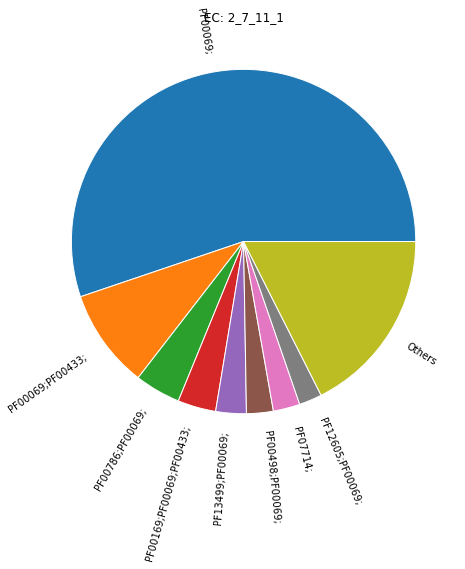

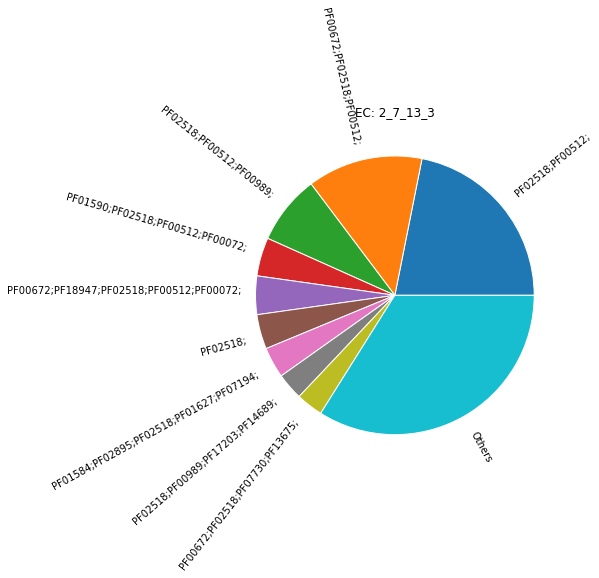

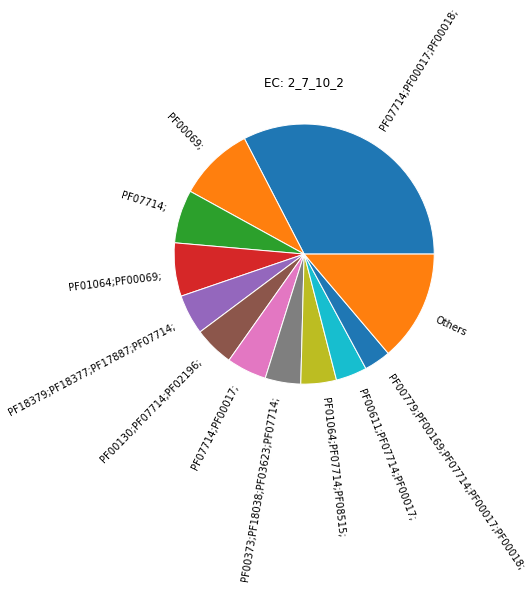

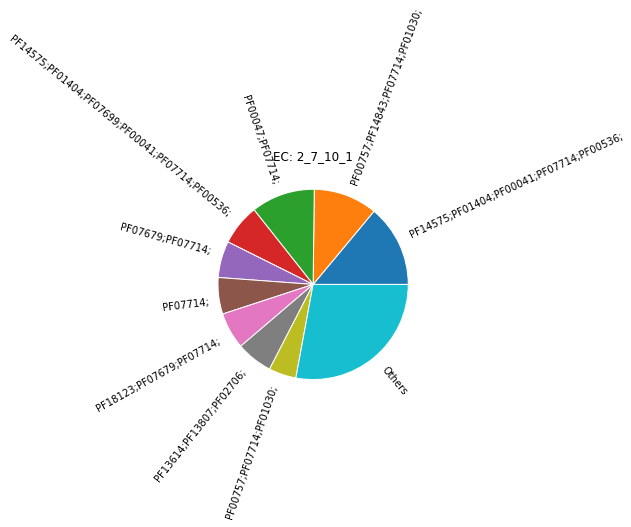

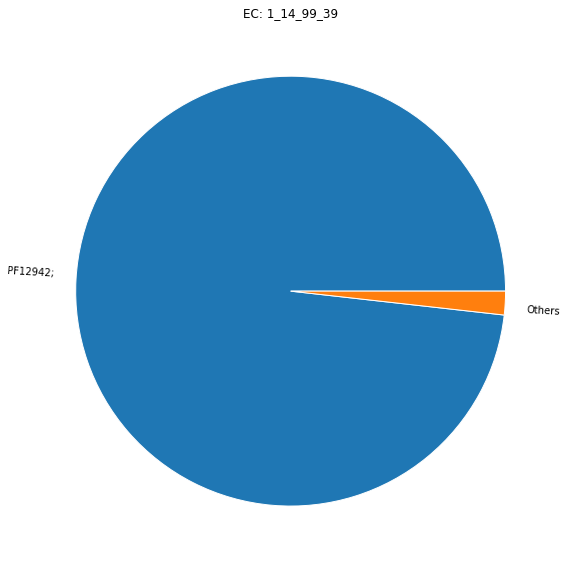

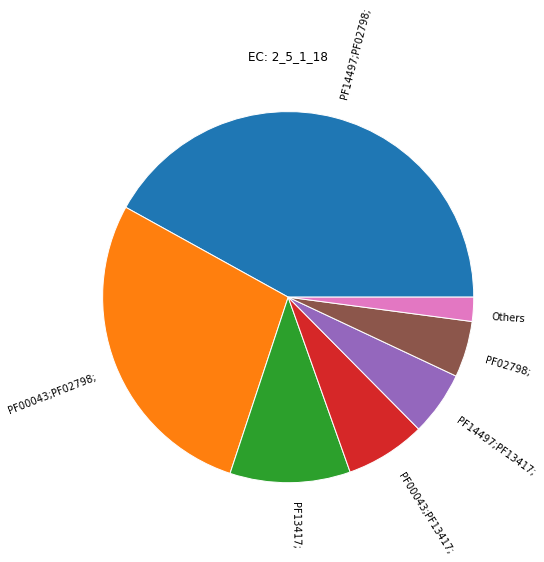

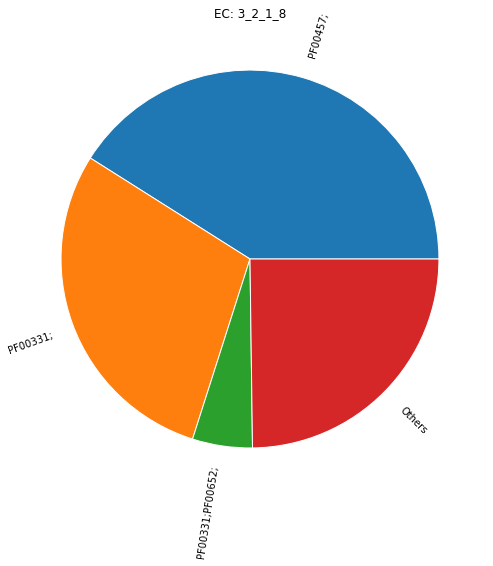

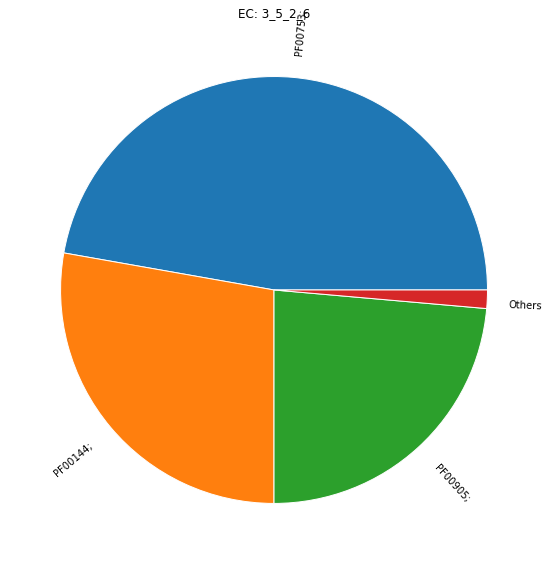

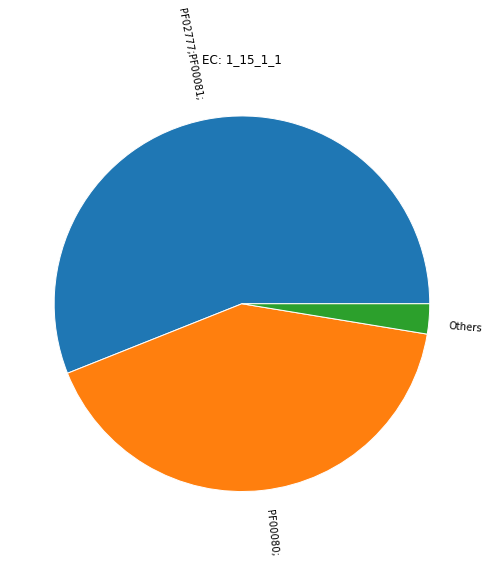

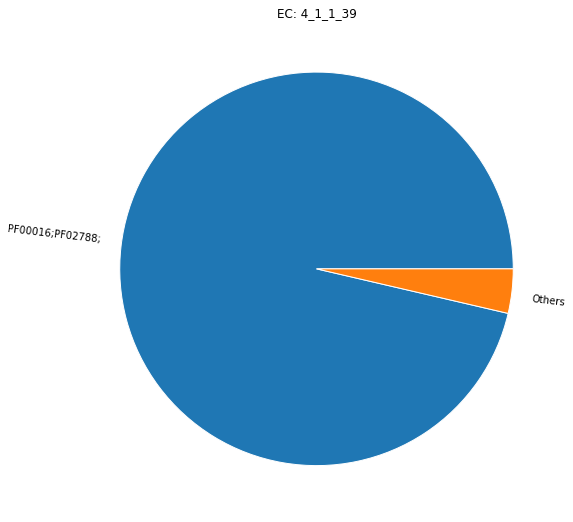

In [6]:
enzyme_cols = ['Entry', 'Cross_reference_Pfam']


for ec in ec_top_10:
    
    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")
    
    #will count each appearance of particular pfam class 
    counters = defaultdict(int)
    df = df[enzyme_cols]
    pfam_counts = df['Cross_reference_Pfam'].value_counts()

    for index, value in pfam_counts.items():

        if value <= 5:
            counters['Others'] += 1
        else:
            counters[index] = value 


    fig, ax = plt.subplots(figsize=(8,8))
    ax.pie(counters.values(), labels = counters.keys(), wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},rotatelabels = 45)
    ax.set_title(f'EC: {ec}')
    plt.tight_layout()

# 2) pH optimum value

- the pH at which the enzyme is most active

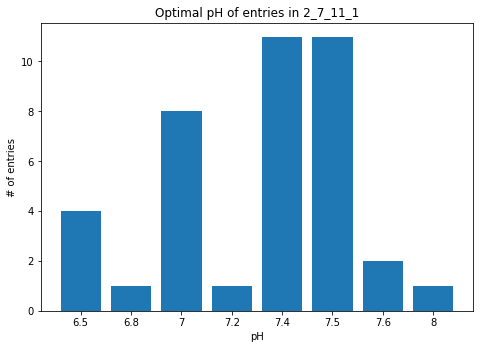

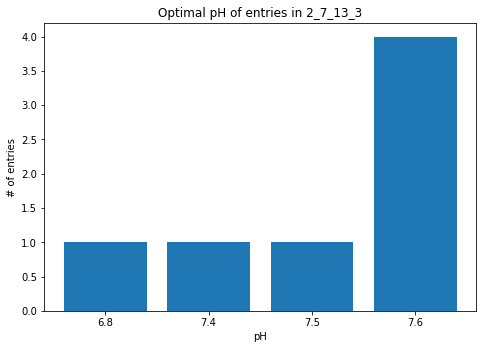

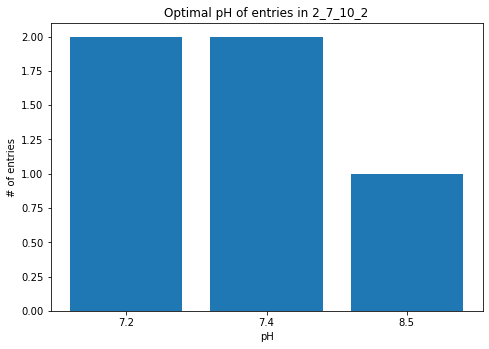

2_7_10_1 does not contain optimal pH values


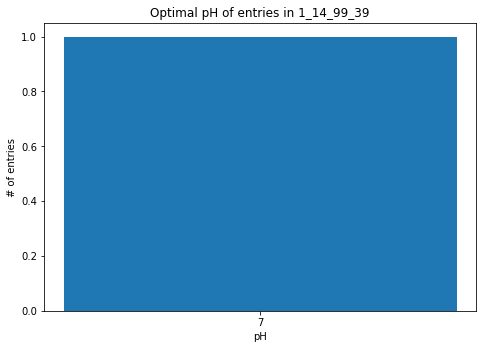

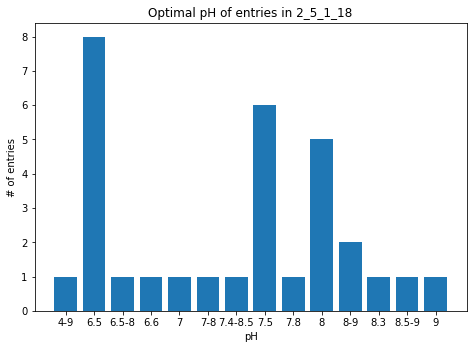

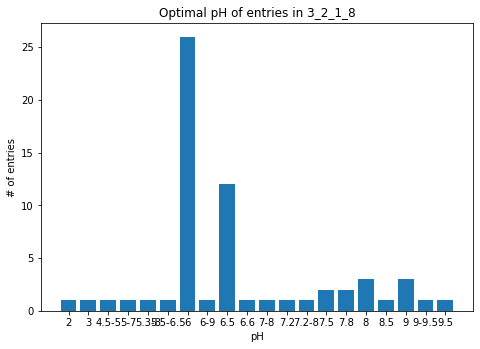

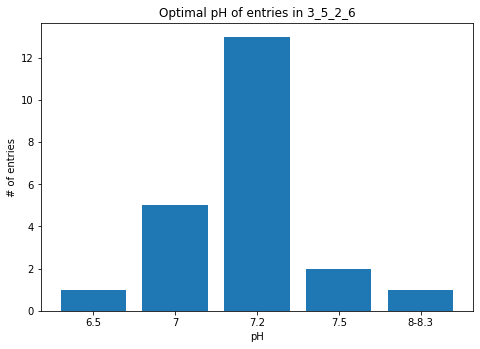

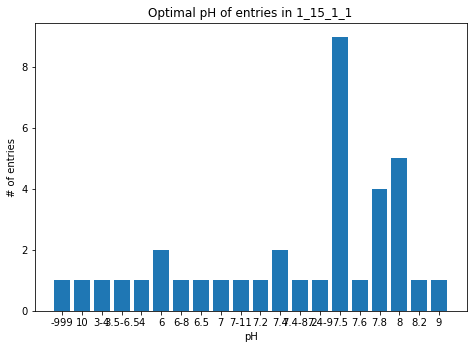

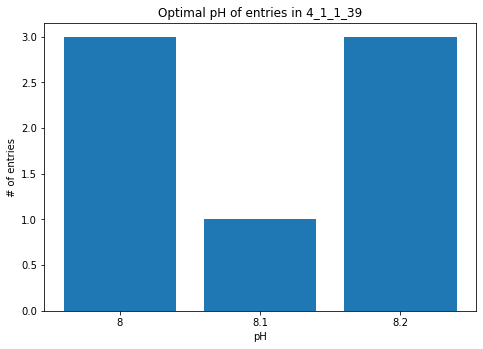

In [22]:
enzyme_cols = ['Entry', 'BRENDA_PHO_DATA']


for ec in ec_top_10:
    
    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")
    
    if 'BRENDA_PHO_DATA' not in df.columns:
        print(f"{ec} does not contain optimal pH values")
        continue 
    
    df = df[enzyme_cols].dropna()

    ls = df.values.tolist()

    pH_counter = {}

    for entry in ls:

        #separate actual pH from reference count in data 
        pH = entry[1].split('_')[0]

        if pH in pH_counter:
            pH_counter[pH].append(entry[0])
        else:
            #create an entry and add a list with annotation name 
            pH_counter[pH] = [entry[0]]

    ordered_pH = OrderedDict(sorted(pH_counter.items(), key=lambda x: x[0]))
    
    keys = list(ordered_pH.keys())

    values = list(ordered_pH.values())

    pH_counts = []

    for x in values:
        #take the number of entries to plot on the y axis
        pH_counts.append(len(x))

    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(keys, pH_counts)
    ax.set_xlabel('pH')
    ax.set_ylabel('# of entries')
    ax.set_title(f'Optimal pH of entries in {ec}')
    plt.show()
   
    



# 3) Temperature Optima 

- need to figure out what to do with values that have -999, may be issue with BRENDA database?

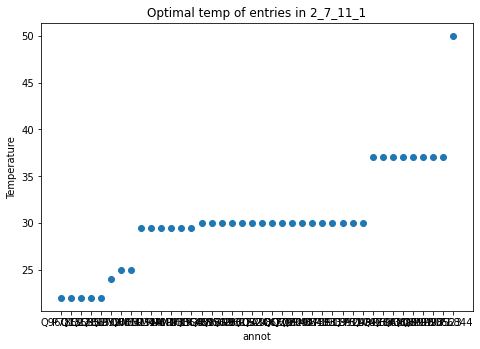

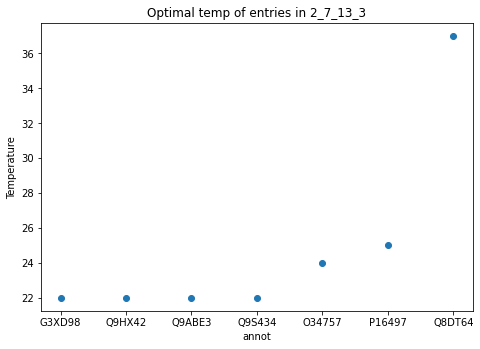

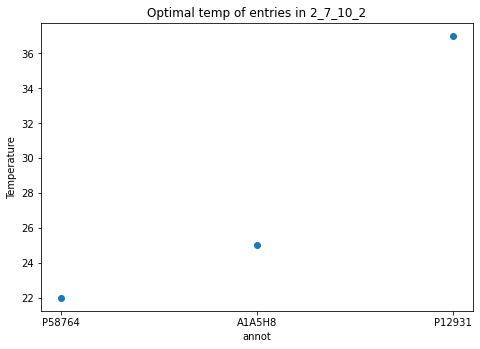

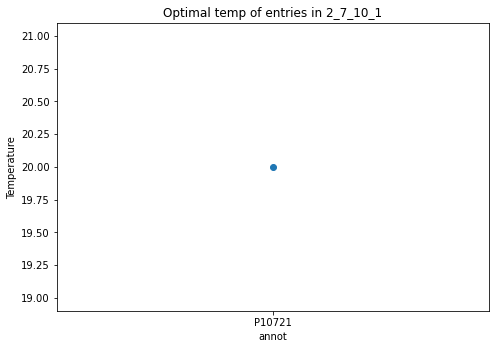

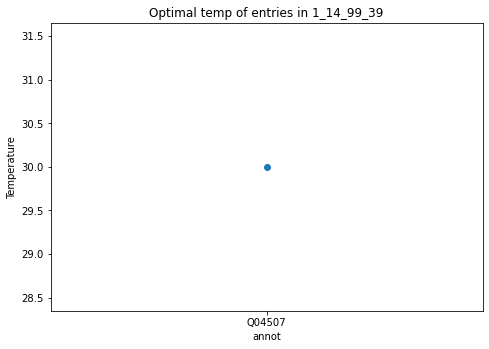

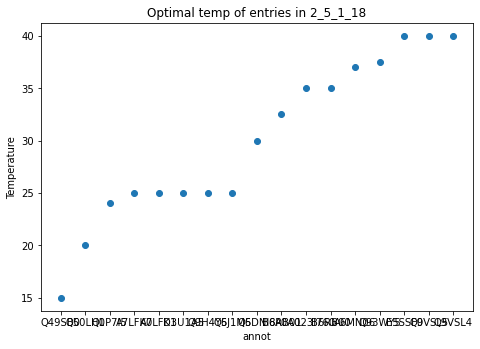

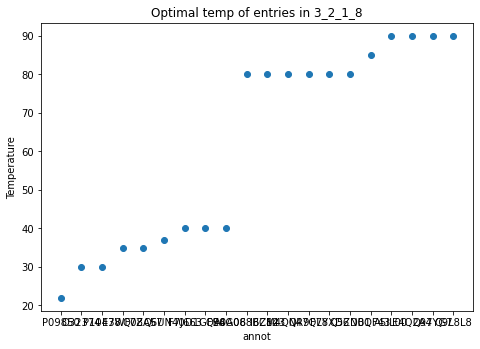

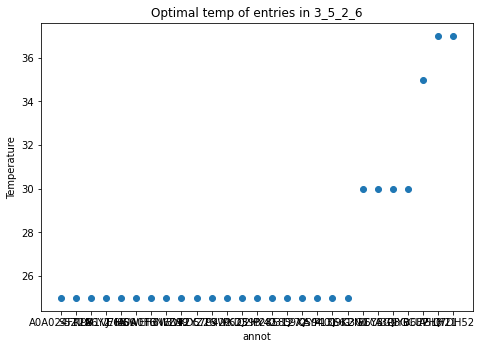

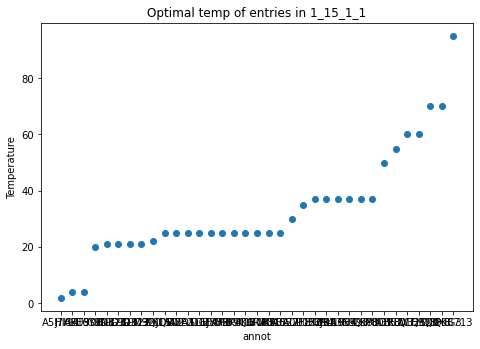

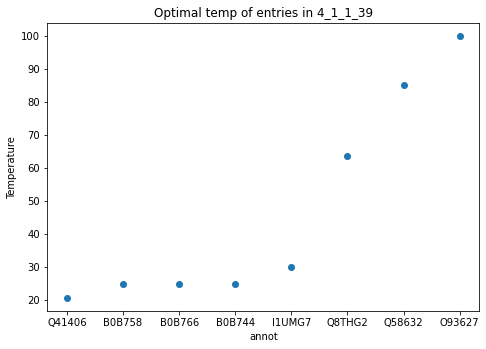

In [5]:
enzyme_cols = ['Entry', 'BRENDA_TO_DATA']

for ec in ec_top_10:

    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")

    if 'BRENDA_TO_DATA' not in df.columns:
        print(f"{ec} does not contain optimal Temp values")
        #continue 

    df = df[enzyme_cols].dropna()

    ls = df.values.tolist() 


    annot_name = []
    temp_data = []

    temp_data = dict()

    for entry in ls:

        #separate actual pH from reference count in data 
        temp = entry[1].split('_')[0]
        
        #catches negative numbers, needed as some temp values in ranges
        if temp[0] == "-":
            continue
            
        
        #if temp is a range e.g 25-40, take the average value
        if '-' in temp:
            a,b = temp.split('-')
            temp = (float(a) + float(b))/2 
        
        
        temp_data[entry[0]] = float(temp)

    ordered_temp = OrderedDict(sorted(temp_data.items(), key=lambda x: x[1]))   


    x_vals = ordered_temp.keys()
    y_vals = ordered_temp.values()

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.scatter(x_vals, y_vals)
    ax.set_xlabel('annot')
    ax.set_ylabel('Temperature')
    ax.set_title(f'Optimal temp of entries in {ec}')
    plt.show()



In [2]:
df = pd.read_csv("../workflows/2_7_11_1/csv/2_7_11_1_uniprot.csv")
# Show all columns
pd.set_option('display.max_columns', None)

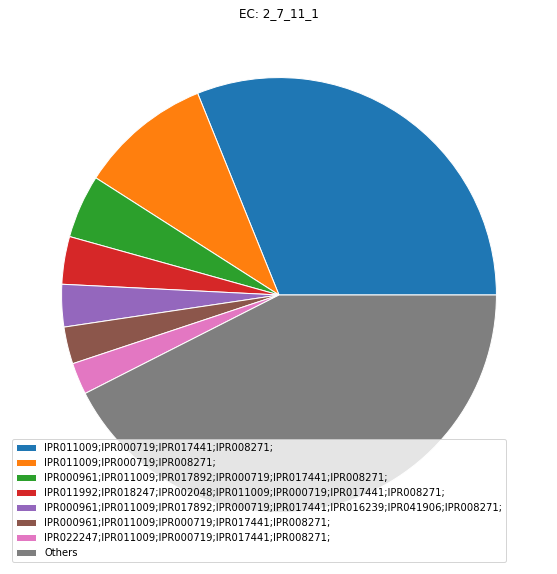

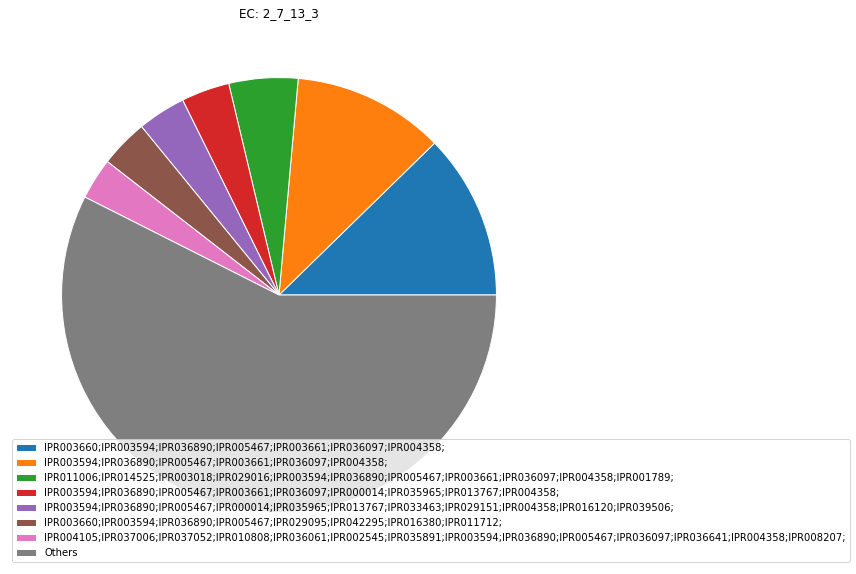

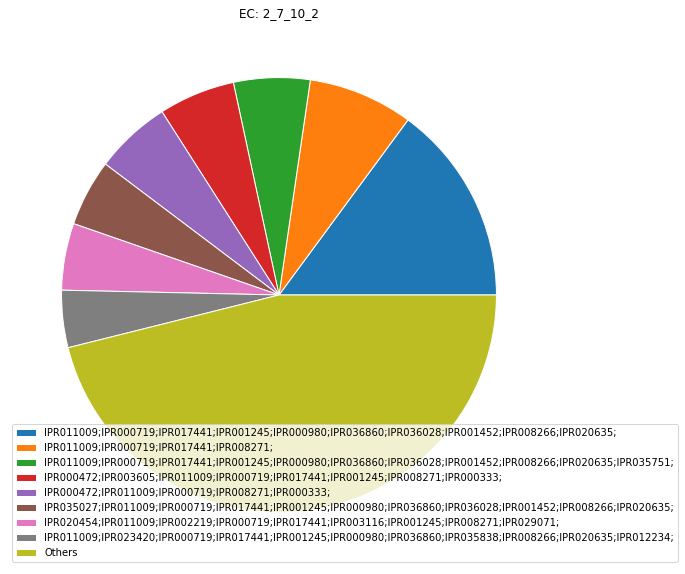

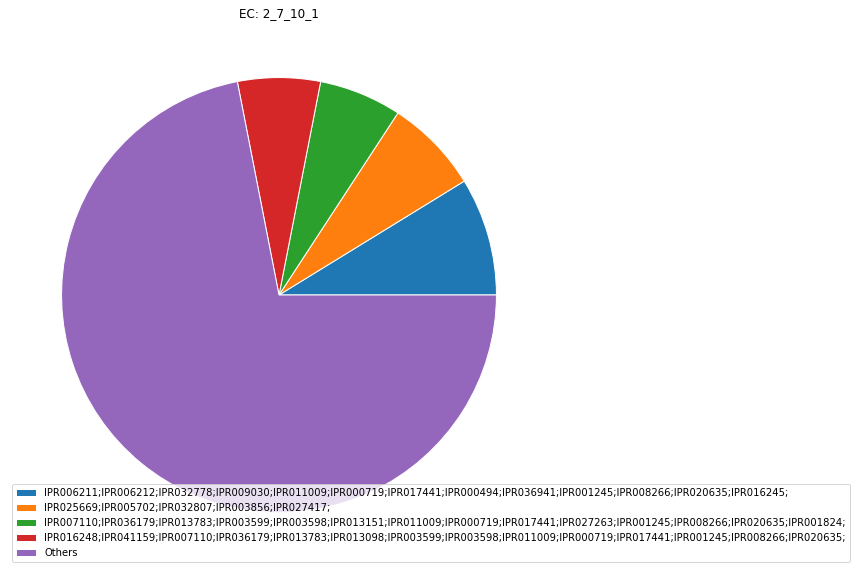

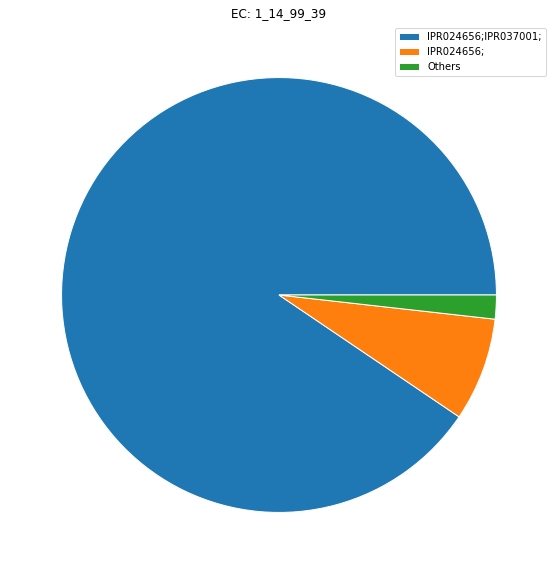

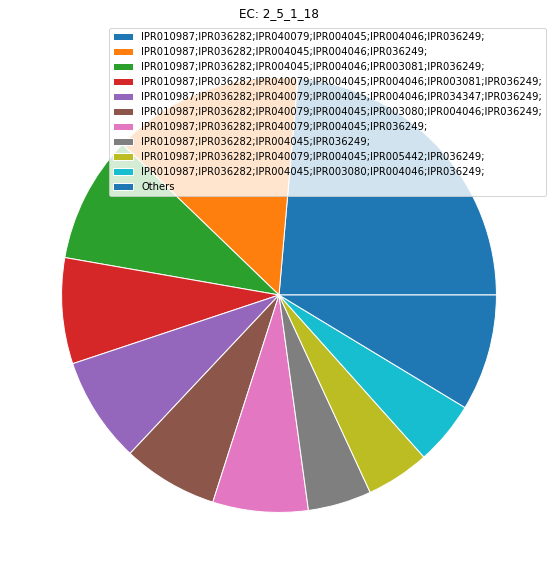

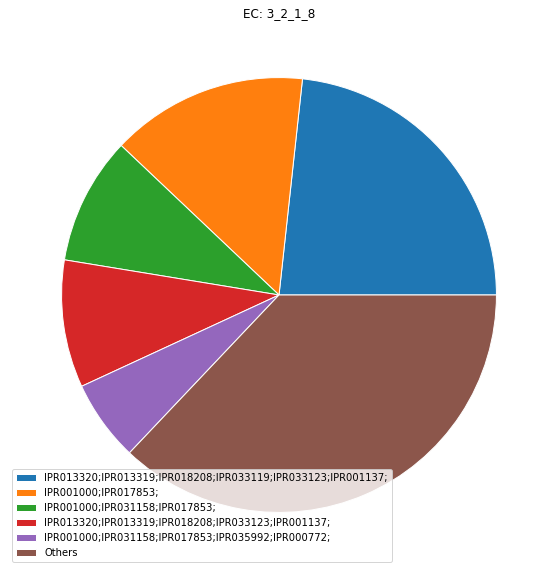

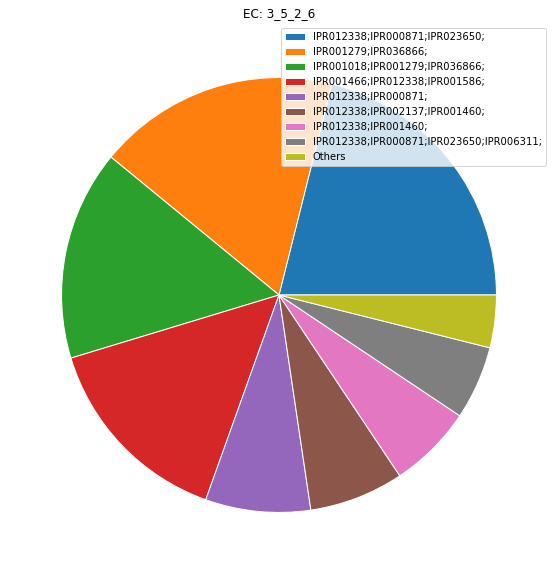

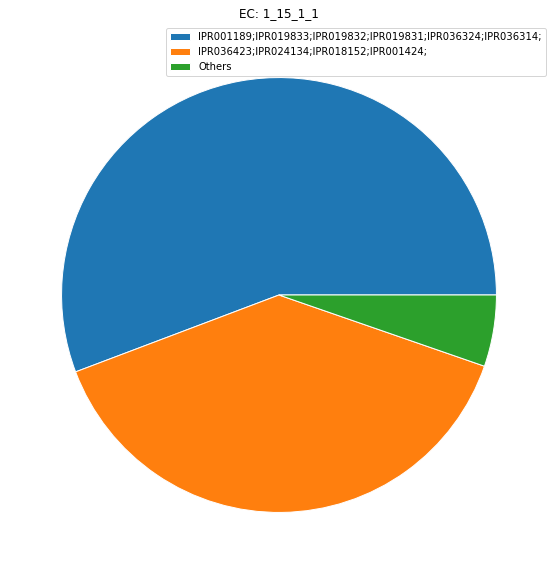

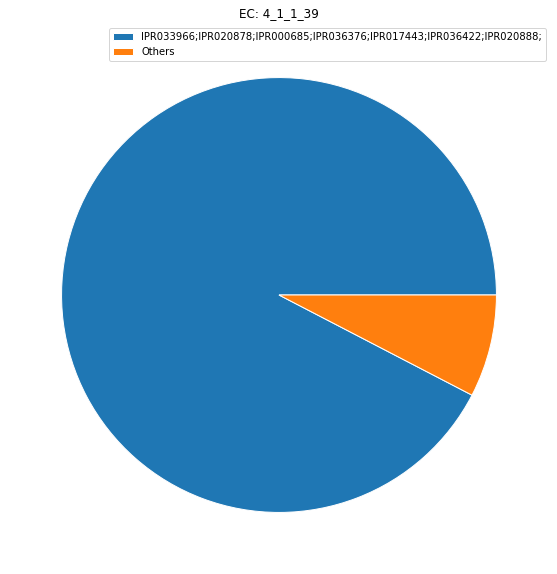

In [23]:

enzyme_cols = ['Entry', 'Cross_reference_InterPro']

for ec in ec_top_10:

    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")

    #will count each appearance of particular pfam class 
    counters = defaultdict(int)

    df = df[enzyme_cols]

    interpro_counts = df['Cross_reference_InterPro'].value_counts()
    #print(interpro_counts)

    for index, value in interpro_counts.items():

        if value <= 5:
            counters['Others'] += 1
        else:
            counters[index] = value 

    fig, ax = plt.subplots(figsize=(10,10))
    ax.pie(counters.values(), wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},rotatelabels = 45)
    ax.set_title(f'EC: {ec}')
    plt.legend(counters.keys())
    #plt.tight_layout()


## Examination of single InterPro group to check for homology 

In [40]:
enzyme_cols = ['Entry', 'Cross_reference_InterPro', 'Protein_families']

df = pd.read_csv("../workflows/4_1_1_39/csv/4_1_1_39_uniprot.csv")
# Show all columns
pd.set_option('display.max_columns', None)

df = df[enzyme_cols]

df = df['Protein_families']

df.values.tolist()


['RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',
 'RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',
 'RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',
 'RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',
 'RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',
 'RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',
 'RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',
 'RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',
 'RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',
 'RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',
 'RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',
 'RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',
 'RuBisCO large chain family; RuBisCO large chain family, Type I subfamily',